# Tarball to Byte-Image Conversion

This notebook converts Docker container filesystem tarballs into
grayscale images using raw byte-to-pixel mapping.


In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

In [2]:
import os
from scripts.tar_to_image import tar_to_grayscale_image


input_tar = os.path.join(
    PROJECT_ROOT, "data", "raw", "docker_tarballs", "alpine_3_19.tar"
)

output_img = os.path.join(
    PROJECT_ROOT, "data", "processed", "images", "alpine_3_19.png"
)

os.makedirs(os.path.dirname(output_img), exist_ok=True)

tar_to_grayscale_image(input_tar, output_img, width=256)


Saved image to D:\projects\prelim-thesis\data\processed\images\alpine_3_19.png
Image shape: (13428, 256)


Image exists: True
Path: D:\projects\prelim-thesis\data\processed\images\alpine_3_19.png


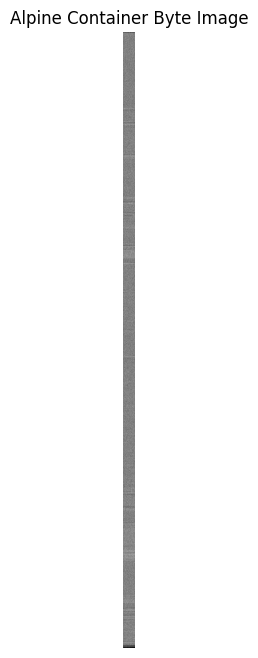

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

img_path = os.path.join(
    PROJECT_ROOT, "data", "processed", "images", "alpine_3_19.png"
)

print("Image exists:", os.path.exists(img_path))
print("Path:", img_path)

img = Image.open(img_path)

plt.figure(figsize=(4, 8))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Alpine Container Byte Image")
plt.show()


In [5]:
input_tar = os.path.join(
    PROJECT_ROOT, "data", "raw", "docker_tarballs", "busybox.tar"
)

output_img = os.path.join(
    PROJECT_ROOT, "data", "processed", "images", "busybox.png"
)

tar_to_grayscale_image(input_tar, output_img, width=256)

Saved image to D:\projects\prelim-thesis\data\processed\images\busybox.png
Image shape: (8712, 256)


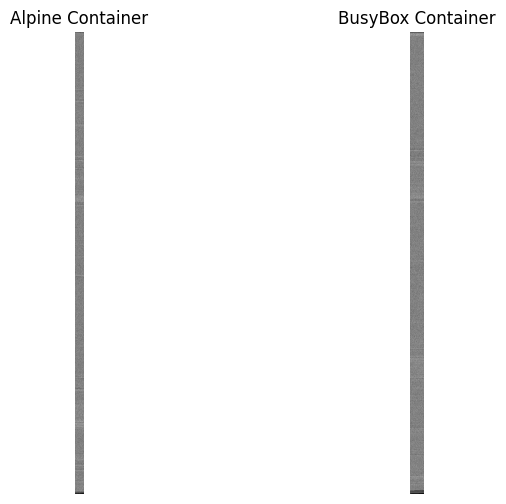

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import os

alpine_img = Image.open(
    os.path.join(PROJECT_ROOT, "data", "processed", "images", "alpine_3_19.png")
)

busybox_img = Image.open(
    os.path.join(PROJECT_ROOT, "data", "processed", "images", "busybox.png")
)

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(alpine_img, cmap="gray")
plt.title("Alpine Container")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(busybox_img, cmap="gray")
plt.title("BusyBox Container")
plt.axis("off")

plt.show()


## Observations on Byte-Level Image Representation

- The generated images exhibit structured, non-random patterns rather than noise.
- Alpine and BusyBox containers show visibly different texture and density distributions.
- These differences arise from variations in filesystem layout, binaries, and metadata.
- This suggests that byte-level image representations preserve meaningful structural information from container filesystems.
